In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
from collections import Counter
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [6]:
df = pd.read_csv('df_CO.csv')

In [333]:
df.head()

,Date,swe_23,cswe_23,sd_23,csd_23,oat_23,swe_33,cswe_33,sd_33,csd_33,...,swe_854,cswe_854,sd_854,csd_854,oat_854,swe_866,cswe_866,sd_866,csd_866,oat_866
0,2011-04-21,33.4,0.5,86,-1,32,11.6,-0.5,27,-2,...,23.3,-0.1,57,-5,38,0.0,0.0,0,0,45
1,2011-04-22,34.2,0.8,93,7,21,10.8,-0.8,25,-2,...,23.8,0.5,61,4,27,0.0,0.0,0,0,41
2,2011-04-23,34.7,0.5,92,-1,22,10.4,-0.4,24,-1,...,23.6,-0.2,60,-1,28,0.0,0.0,0,0,36
3,2011-04-24,35.4,0.7,92,0,26,10.7,0.3,29,5,...,24.2,0.6,64,4,29,0.3,0.3,2,2,37
4,2011-04-25,35.7,0.3,94,2,25,11.5,0.8,35,6,...,24.8,0.6,69,5,26,0.4,0.1,2,0,33


In [334]:
translate = {
    'swe': 'Snow Water Equivalent (in)',
    'cswe': 'Change In Snow Water Equivalent (in)',
    'sd': 'Snow Depth (in)',
    'csd': 'Change In Snow Depth (in)',
    'oat': 'Observed Air Temperature (degrees farenheit)'
}

df.describe()

,swe_23,cswe_23,sd_23,csd_23,oat_23,swe_33,cswe_33,sd_33,csd_33,oat_33,...,swe_854,cswe_854,sd_854,csd_854,oat_854,swe_866,cswe_866,sd_866,csd_866,oat_866
count,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,...,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000
mean,6.846537,-0.003367,22.525869,-0.006022,28.812757,4.316781,-0.001204,14.969614,-0.002464,30.127840,...,4.961347,-0.003531,17.526964,-0.006844,33.565015,1.477553,0.000219,4.762661,-0.002190,37.798248
std,7.977716,0.352750,23.210940,2.119504,13.002548,5.671325,0.270762,18.709514,1.772290,12.854729,...,6.196143,0.279260,20.136912,1.777370,14.197633,2.526371,0.195121,8.044224,1.679232,12.735388
min,0.000000,-3.100000,0.000000,-7.000000,-20.000000,0.000000,-2.100000,0.000000,-8.000000,-18.000000,...,0.000000,-1.800000,0.000000,-9.000000,-15.000000,0.000000,-2.800000,0.000000,-11.000000,-9.000000
25%,0.000000,0.000000,0.000000,-1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,21.000000,...,0.000000,0.000000,0.000000,-1.000000,23.000000,0.000000,0.000000,0.000000,0.000000,29.000000
50%,3.700000,0.000000,17.000000,0.000000,30.000000,1.100000,0.000000,3.000000,0.000000,31.000000,...,2.100000,0.000000,8.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,38.000000
75%,12.200000,0.100000,42.000000,0.000000,39.000000,7.800000,0.000000,29.000000,0.000000,41.000000,...,8.600000,0.000000,33.000000,0.000000,46.000000,2.300000,0.000000,8.000000,0.000000,48.000000
max,39.800000,1.900000,95.000000,19.000000,58.000000,23.400000,1.800000,89.000000,22.000000,58.000000,...,27.100000,2.400000,93.000000,17.000000,61.000000,12.700000,3.500000,41.000000,23.000000,64.000000


In [335]:
df.head()

,Date,swe_23,cswe_23,sd_23,csd_23,oat_23,swe_33,cswe_33,sd_33,csd_33,...,swe_854,cswe_854,sd_854,csd_854,oat_854,swe_866,cswe_866,sd_866,csd_866,oat_866
0,2011-04-21,33.4,0.5,86,-1,32,11.6,-0.5,27,-2,...,23.3,-0.1,57,-5,38,0.0,0.0,0,0,45
1,2011-04-22,34.2,0.8,93,7,21,10.8,-0.8,25,-2,...,23.8,0.5,61,4,27,0.0,0.0,0,0,41
2,2011-04-23,34.7,0.5,92,-1,22,10.4,-0.4,24,-1,...,23.6,-0.2,60,-1,28,0.0,0.0,0,0,36
3,2011-04-24,35.4,0.7,92,0,26,10.7,0.3,29,5,...,24.2,0.6,64,4,29,0.3,0.3,2,2,37
4,2011-04-25,35.7,0.3,94,2,25,11.5,0.8,35,6,...,24.8,0.6,69,5,26,0.4,0.1,2,0,33


In [336]:
# get columns with prefix swe
swe = df.filter(regex='^swe', axis=1).copy()
swe.head()

,swe_23,swe_33,swe_36,swe_38,swe_42,swe_45,swe_62,swe_66,swe_67,swe_84,...,swe_807,swe_817,swe_818,swe_821,swe_825,swe_828,swe_829,swe_853,swe_854,swe_866
0,33.4,11.6,6.6,35.3,24.3,39.4,15.2,42.1,42.0,13.6,...,16.3,16.7,11.8,38.6,6.6,33.4,17.1,20.7,23.3,0.0
1,34.2,10.8,5.9,35.1,25.1,40.0,15.4,43.2,42.6,14.0,...,16.1,16.1,12.2,38.7,6.6,34.3,17.1,19.8,23.8,0.0
2,34.7,10.4,5.1,35.1,25.1,40.1,15.3,43.6,42.8,14.1,...,15.7,15.7,12.3,38.7,6.3,34.4,17.3,19.3,23.6,0.0
3,35.4,10.7,5.5,36.7,25.6,40.4,15.8,44.3,43.0,14.6,...,15.8,16.1,12.5,39.3,6.5,34.7,17.8,19.8,24.2,0.3
4,35.7,11.5,6.5,37.8,26.1,40.8,16.2,45.1,43.3,14.8,...,15.7,16.6,12.8,39.7,6.5,35.2,18.5,20.3,24.8,0.4


<AxesSubplot:>

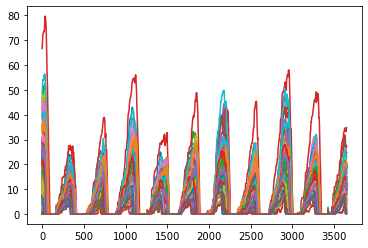

In [337]:
# snow water over time, 100 stations
swe.plot(kind='line', legend=False)

<AxesSubplot:>

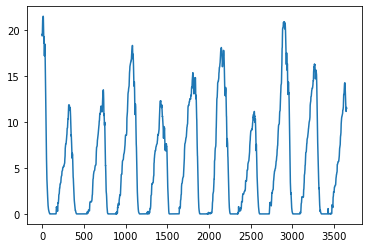

In [338]:
# average
swe['mean'] = swe.mean(skipna=True, axis=1)
swe['mean'].plot.line()

In [420]:
def filter_days(station_series, days_back=5, plot=False, outliers=None):
    moving_average = np.zeros(len(station_series))
    t = np.arange(len(station_series))
    for i in t:
        moving_average[i] = np.mean(station_series.values[np.max([0, i-days_back]):(i+1)])
    
    noise = station_series.values - moving_average
        
    outlier_dates = (np.argwhere(noise > (3*np.std(noise))).T)[0]
    super_outlier_dates = (np.argwhere(noise > (10*np.std(noise))).T)[0]


    if outliers:
        plt.plot(t, station_series, marker='x', markerfacecolor='r', markersize=12, markevery=outliers)
        plt.plot(t, moving_average)
        plt.figure()
        plt.title('Noise')
        plt.plot(t[:-5], noise[:-5], marker='x', markerfacecolor='r', markersize=12, markevery=outliers)
        
    return outlier_dates, super_outlier_dates

def filter_all_station_days(dff):
    top_outliers = Counter()
    ind_outliers = {}
    sup_outliers = {}
    for station in dff:
        o, s_o = filter_days(dff[station])
        ind_outliers[station] = list(o)
        if len(s_o) > 0:
            sup_outliers[station] = list(s_o)
        for day in o:
            top_outliers[day] += 1

    return top_outliers, ind_outliers, sup_outliers

def kitchen_sink(data_type):
    print(translate[data_type])
    
    data = df.filter(regex='^'+data_type, axis=1).copy()

    # find outliers, print them
    outliers, ind_outliers, sup_outliers = filter_all_station_days(data)
    top_outliers = [o[0] for o in outliers.most_common(10)]
    disp_sup_outliers = list(set().union(*sup_outliers.values()))
    print('common outliers: ', top_outliers)
    print('extra bad individual outliers: ', sup_outliers)
    print(disp_sup_outliers)
    
    # plot mean, mean noise, and important outliers
    plt.figure()
    plt.title(translate[data_type])
    data['mean'] = data.mean(skipna=True, axis=1)
    filter_days(data['mean'], outliers=top_outliers)
    data.plot(title='100 stations over time', kind='line', legend=False)
    plt.scatter(top_outliers, [-2]*len(top_outliers), color='black', label='Common Outlier Dates')
    plt.scatter(disp_sup_outliers, [-1]*len(disp_sup_outliers), marker='x', color='red', label='Extra Bad Station Outlier')
    
    return ind_outliers

def remove_outliers(data, outliers):

    for key, value in outliers.items():
        for v in value:
            if v > 3 and v < len(data.index)-3:
                data.loc[v, key] = None

Snow Water Equivalent (in)
common outliers:  [2091, 2884, 2067, 2883, 2093, 2885, 2087, 2068, 2092, 2879]
extra bad individual outliers:  {}
[]


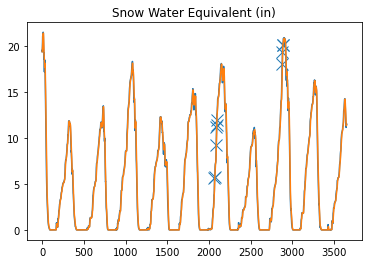

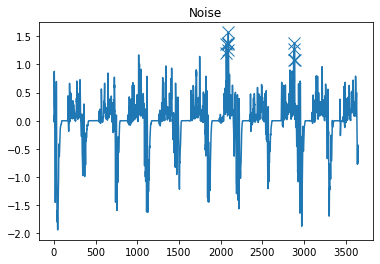

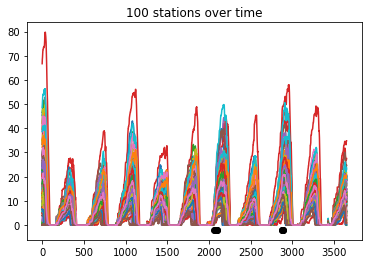

In [421]:
_ = kitchen_sink('swe')

Snow Depth (in)
common outliers:  [2087, 1017, 1748, 2067, 1016, 2874, 2068, 1823, 2873, 3215]
extra bad individual outliers:  {'sd_33': [1707], 'sd_97': [3578], 'sd_340': [3616], 'sd_514': [1017], 'sd_521': [2220, 3284], 'sd_540': [1405], 'sd_555': [1823], 'sd_636': [1823], 'sd_721': [3635, 3638, 3649], 'sd_818': [1458, 3616], 'sd_866': [2165]}
[3616, 3649, 1707, 2220, 1458, 3635, 3284, 2165, 3638, 1017, 3578, 1405, 1823]


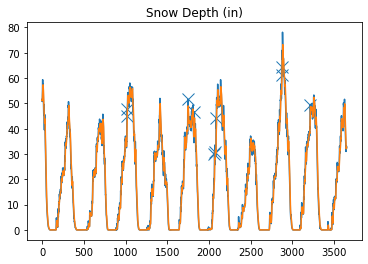

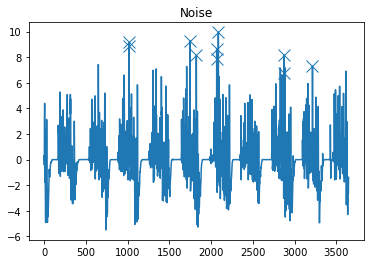

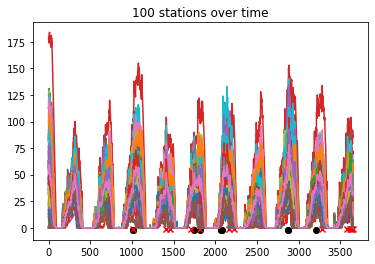

In [422]:
_ = kitchen_sink('sd')

Observed Air Temperature (degrees farenheit)
common outliers:  [2090, 637, 706, 1356, 2817, 2816, 1797, 1754, 2845, 2113]
extra bad individual outliers:  {'oat_107': [228, 331, 332, 333], 'oat_366': [56, 59, 61, 74, 78, 80]}
[228, 74, 331, 332, 333, 78, 80, 56, 59, 61]


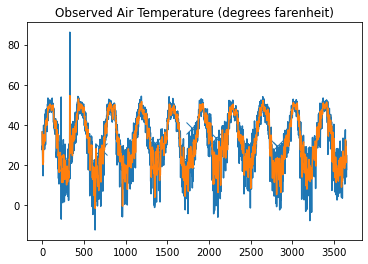

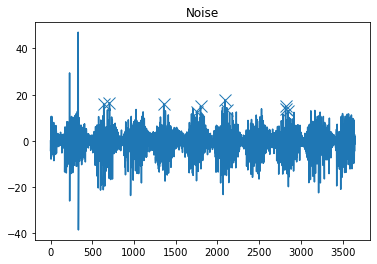

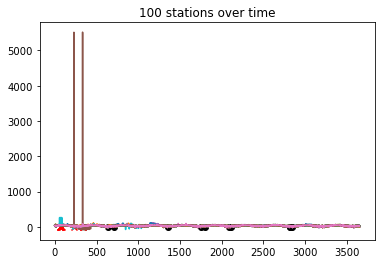

In [423]:
oat_outliers = kitchen_sink('oat')

Observed Air Temperature (degrees farenheit)
common outliers:  []
extra bad individual outliers:  {}
[]


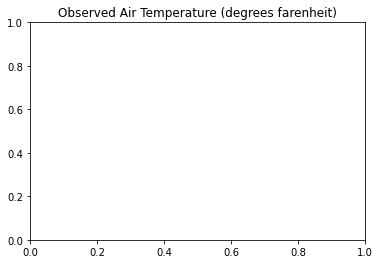

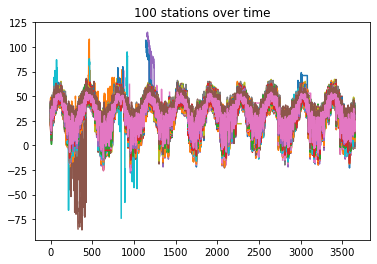

In [425]:
remove_outliers(df, oat_outliers)
oat_outliers = kitchen_sink('oat')

In [31]:
def iForest(data, outliers_fraction=.01):
    copy = data.loc[:, data.columns != 'Date'].T.copy()
    scaler = StandardScaler()
    scaled = scaler.fit_transform(copy)
    
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp = imp.fit(scaled)

    scaled = imp.transform(scaled)
    # scaled = scaled.T
    
    model = IsolationForest(contamination=outliers_fraction)
    model.fit(scaled)
    
    copy['anomaly'] = pd.Series(model.predict(scaled), index=copy.index)
    
    
    
    a = copy.loc[copy['anomaly'] == -1] #anomaly
    
    print('Found {} anomalous stations'.format(len(a.index)))
    plot_data = copy.filter(regex='^sd', axis=0)
    plot_a = a.filter(regex='^sd', axis=0)
    plot_data.mean()
    fig, ax = plt.subplots(figsize=(10,6))
    plt.scatter(np.arange(len(plot_data.columns)), plot_data.mean(), label='mean')
    plt.scatter(np.arange(len(plot_a.columns)), plot_a.iloc[0], label=('anomaly'+str(plot_a.index[0])))
    # plt.scatter(np.arange(len(plot_a.columns)), plot_a.iloc[1], label=('anomaly'+str(plot_a.index[1])))
    # plt.scatter(np.arange(len(plot_a.columns)), plot_a.iloc[2], label=('anomaly'+str(plot_a.index[2])))

    plt.legend()
    
    plt.show();

Found 6 anomalous stations


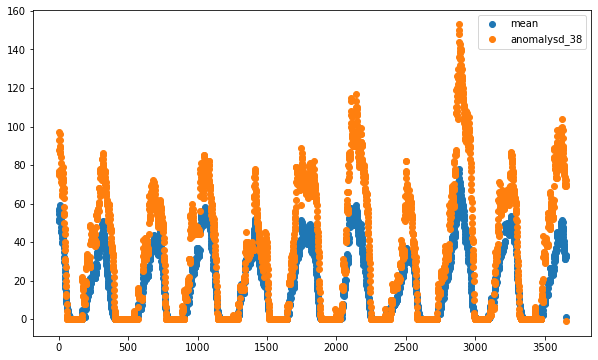

In [32]:
iForest(df)

## Statistical outlier anlaysis

Take data from each column of dataset, assume normally distributed, compute mean and SD, examine % of data outside of 95% int.

<AxesSubplot:xlabel='swe_23'>

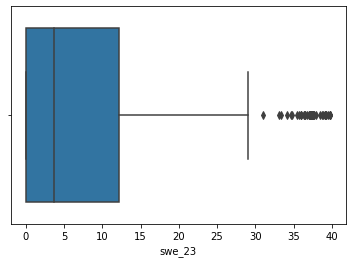

In [18]:
import seaborn as sns
sns.boxplot(x=df['swe_23'])

In [52]:
from scipy import stats

# Remove date column
df2 = df.drop(['Date'], axis=1)

# determine z-value required ot drop datapoint
threshold = 3 #corresponds to 99% of data

z = np.abs(stats.zscore(df2,axis=1)) #get z score of each datapoint within its column

#print when z score is greater than threshold
print(np.where(z > threshold))

(array([   0,    0,    0, ..., 3652, 3652, 3652], dtype=int64), array([ 27,  37,  42, ..., 357, 432, 507], dtype=int64))


(array([1503.,  281.,  387.,  380.,  394.,  436.,  191.,   52.,   17.,
          12.]),
 array([  0. ,  11.4,  22.8,  34.2,  45.6,  57. ,  68.4,  79.8,  91.2,
        102.6, 114. ]),
 <BarContainer object of 10 artists>)

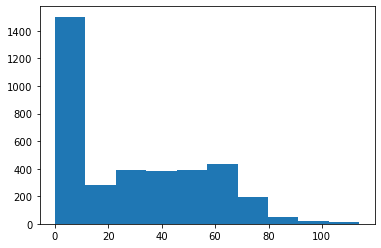

In [74]:
plt.hist(df2.iloc[:,357])

(array([1479.,  309.,  310.,  392.,  453.,  368.,  191.,   80.,   23.,
          48.]),
 array([  0. ,  11.8,  23.6,  35.4,  47.2,  59. ,  70.8,  82.6,  94.4,
        106.2, 118. ]),
 <BarContainer object of 10 artists>)

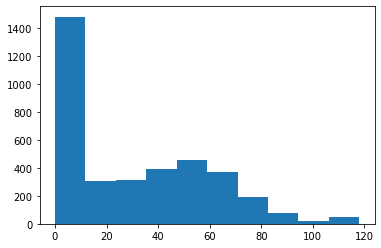

In [71]:
plt.hist(df2.iloc[:,27])

## comments
Appears we are getting a bunch of outliers in columns with a lot of zeros

Checking data - zeros are seasonal. Drop zeros from dataframe.

In [73]:
translate

{'swe': 'Snow Water Equivalent (in)',
 'cswe': 'Change In Snow Water Equivalent (in)',
 'sd': 'Snow Depth (in)',
 'csd': 'Change In Snow Depth (in)',
 'oat': 'Observed Air Temperature (degrees farenheit)'}

In [78]:
# split data frame into content types
swe = df.filter(regex='^swe', axis=1).copy()
sd = df.filter(regex='^sd', axis=1).copy()
oat = df.filter(regex='^oat', axis=1).copy()
cswe = df.filter(regex='^cswe', axis=1).copy()
csd = df.filter(regex='^csd', axis=1).copy()
oat.head()

,oat_23,oat_33,oat_36,oat_38,oat_42,oat_45,oat_62,oat_66,oat_67,oat_84,...,oat_807,oat_817,oat_818,oat_821,oat_825,oat_828,oat_829,oat_853,oat_854,oat_866
0,32,42,40,38,34,31,35,33,33,35,...,36,37,32,40,37,31,38,40,38,45
1,21,31,33,34,24,20,26,22,24,22,...,27,31,25,28,28,21,27,34,27,41
2,22,34,38,36,20,21,27,21,24,27,...,27,34,22,28,26,17,24,36,28,36
3,26,32,32,31,28,25,26,28,29,27,...,32,31,25,29,31,26,30,31,29,37
4,25,28,29,27,30,19,27,28,30,26,...,30,24,29,22,31,25,26,26,26,33


In [127]:
# determine z-value required ot drop datapoint
threshold = 3 #corresponds to 99% of data

z = np.abs(stats.zscore(cswe,axis=1)) #get z score of each datapoint within its column

#print when z score is greater than threshold
print(np.where(z > threshold))

(array([   0,    2,    3, ..., 3650, 3651, 3651], dtype=int64), array([31, 31,  3, ..., 42, 42, 74], dtype=int64))


In [128]:
k=np.where(z > threshold)

In [129]:
x=234
print(k[0][x],k[1][x])

213 33


In [133]:
cswe.iloc[:,33].describe()

count    3653.000000
mean       -0.008514
std         0.583378
min        -3.100000
25%         0.000000
50%         0.000000
75%         0.100000
max         3.200000
Name: cswe_228, dtype: float64

In [134]:
cswe.iloc[213,33]

1.0

(array([   9.,   55.,  146.,  146., 2103.,  945.,  196.,   35.,   14.,
           4.]),
 array([-3.1 , -2.47, -1.84, -1.21, -0.58,  0.05,  0.68,  1.31,  1.94,
         2.57,  3.2 ]),
 <BarContainer object of 10 artists>)

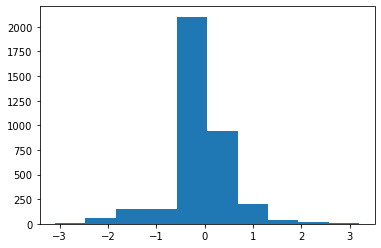

In [135]:
plt.hist(cswe.iloc[:,33])

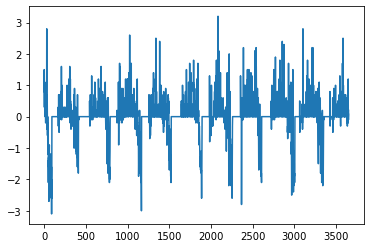

In [136]:
plt.plot(cswe.iloc[:,33])

## comments

We see that the change in x columns do fine (since they're mean 0).

Let's remove 0s and perform outlier detection

In [168]:
dfNan = df.replace(0, np.nan)

In [169]:
dfNan.head()

,Date,swe_23,cswe_23,sd_23,csd_23,oat_23,swe_33,cswe_33,sd_33,csd_33,...,swe_854,cswe_854,sd_854,csd_854,oat_854,swe_866,cswe_866,sd_866,csd_866,oat_866
0,2011-04-21,33.4,0.5,86.0,-1.0,32.0,11.6,-0.5,27.0,-2.0,...,23.3,-0.1,57.0,-5.0,38.0,NaN,NaN,NaN,NaN,45.0
1,2011-04-22,34.2,0.8,93.0,7.0,21.0,10.8,-0.8,25.0,-2.0,...,23.8,0.5,61.0,4.0,27.0,NaN,NaN,NaN,NaN,41.0
2,2011-04-23,34.7,0.5,92.0,-1.0,22.0,10.4,-0.4,24.0,-1.0,...,23.6,-0.2,60.0,-1.0,28.0,NaN,NaN,NaN,NaN,36.0
3,2011-04-24,35.4,0.7,92.0,NaN,26.0,10.7,0.3,29.0,5.0,...,24.2,0.6,64.0,4.0,29.0,0.3,0.3,2.0,2.0,37.0
4,2011-04-25,35.7,0.3,94.0,2.0,25.0,11.5,0.8,35.0,6.0,...,24.8,0.6,69.0,5.0,26.0,0.4,0.1,2.0,NaN,33.0


In [191]:

# Remove date column
dfOutlier = dfNan.drop(['Date'], axis=1)

# determine z-value required ot drop datapoint
threshold = 2.5 #corresponds to xx% of data

z = np.abs(stats.zscore(dfOutlier,axis=1,nan_policy="omit")) #get z score of each datapoint within its column

#print when z score is greater than threshold
#print(np.where(z > threshold))

k=np.where(z > threshold)
print("z-score threshold: ", threshold)
print("z-score as percentage: ", stats.norm.sf(threshold)*2)
print("total number of data points idetified as outliers: ",len(k[1]))
print("Percentage of data points identified as outliers: ", len(k[1])/sum(dfOutlier.count()))

z-score threshold:  2.5
z-score as percentage:  0.012419330651552265
total number of data points idetified as outliers:  17130
Percentage of data points identified as outliers:  0.015334141963898077


## Comments
The above cell indicates that about 1.5% of data points are outside where we would expect 98.8% of our data to lie.